# Analisis Baseline ENose Kakao

> 2 Juni 2022

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [1]:
from datetime import date

import numpy as np
import pandas as pd
from snhlib.dataviz import CalcLDA, CalcPCA
from snhlib.multitools import DataGeNose

# import warnings
# warnings.filterwarnings("ignore")

%config InlineBackend.figure_formats = ['svg']  # svg | retina == png high res
%matplotlib inline

In [2]:
tanggal = f"{date.today().year}_{date.today().month}_{date.today().day}"
print(tanggal)

2022_6_2


In [3]:
COLS = [f"S{i+1}" for i in range(10)]


def convert_data(df: pd.DataFrame) -> np.ndarray:
    new_df = pd.DataFrame(df[COLS].apply(lambda x: x[0]))
    return new_df

In [4]:
list_rawdata = pd.read_csv("data/list_rawdata_butter.csv")
list_rawdata.head()

,path,label,group,names
0,/Users/shidiq/Library/CloudStorage/OneDrive-Personal/Personal Projects/2022-enose kakao/resources/Hasil Pengukuran e-Nose Sample Butter/Rejected/400-600/TK65-1.csv,0,B,TK65-1
1,/Users/shidiq/Library/CloudStorage/OneDrive-Personal/Personal Projects/2022-enose kakao/resources/Hasil Pengukuran e-Nose Sample Butter/Rejected/400-600/TK39-1.csv,0,B,TK39-1
2,/Users/shidiq/Library/CloudStorage/OneDrive-Personal/Personal Projects/2022-enose kakao/resources/Hasil Pengukuran e-Nose Sample Butter/Rejected/400-600/TK41-1.csv,0,B,TK41-1
3,/Users/shidiq/Library/CloudStorage/OneDrive-Personal/Personal Projects/2022-enose kakao/resources/Hasil Pengukuran e-Nose Sample Butter/Rejected/400-600/TK26-1.csv,0,B,TK26-1
4,/Users/shidiq/Library/CloudStorage/OneDrive-Personal/Personal Projects/2022-enose kakao/resources/Hasil Pengukuran e-Nose Sample Butter/Rejected/400-600/TK42-1.csv,0,B,TK42-1


## Extract Baseline Value

In [5]:
data_df = pd.DataFrame()
for i, item in enumerate(list_rawdata.path.values):
    data = DataGeNose(item)
    x = convert_data(data.open)
    x = pd.DataFrame(x).transpose()
    x.columns = [str(j) for j in x.columns]
    x["label"] = list_rawdata.loc[i, "label"]
    x["group"] = list_rawdata.loc[i, "group"]
    x["names"] = list_rawdata.loc[i, "names"]
    x.index = [i]
    data_df = pd.concat([data_df, x], axis=0)

data_df.to_parquet("data/data_baseline.parquet", index=False)
data_df.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,label,group,names
0,1490.88125,2931.89750,1288.250,2130.77625,2026.55625,2152.72,1288.500,2156.5875,3305.875,2866.625,0,B,TK65-1
1,1830.87000,3192.13500,1353.125,2460.25750,2163.08375,2259.97,1415.375,2788.0575,3490.500,3114.500,0,B,TK39-1
2,1767.59000,3164.47625,1329.000,2398.37750,2129.25500,2232.47,1379.750,2720.4000,3475.375,3090.000,0,B,TK41-1
3,1661.93500,3068.55625,1325.250,2297.07875,2100.64000,2207.50,1364.250,2545.7925,3401.625,3022.375,0,B,TK26-1
4,1718.15250,3117.19750,1326.250,2351.81875,2109.37000,2220.15,1383.250,2626.7025,3444.625,3051.750,0,B,TK42-1


In [6]:
data_df.shape

(135, 13)

## Analisis PCA terhadap seluruh data

In [7]:
X = data_df.values[:, :-3]
y = data_df.label.values

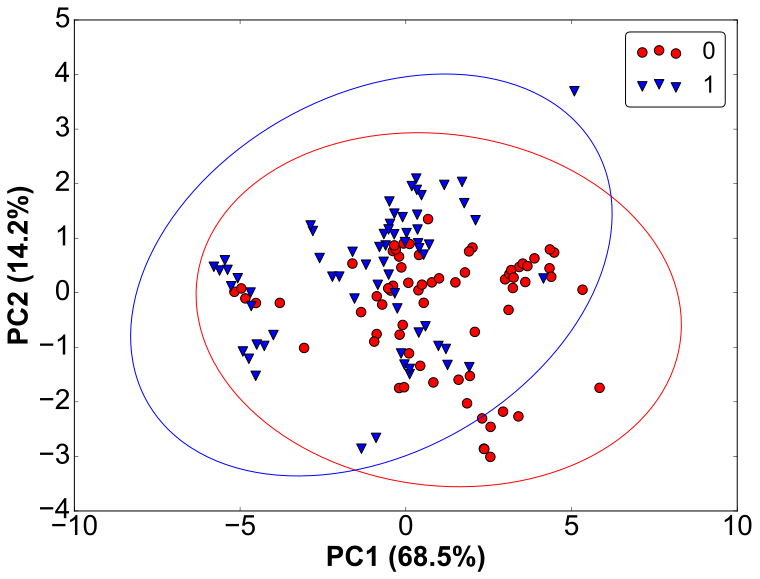

In [8]:
pca = CalcPCA()
pca.fit(X, y)
fig = pca.plotpc()

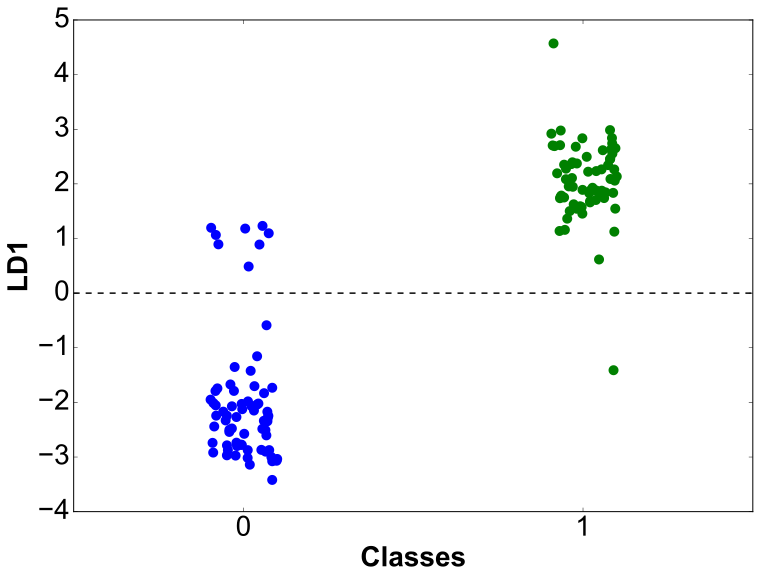

In [9]:
lda = CalcLDA()
lda.fit(X, y)
fig = lda.plotlda()

In [10]:
y2 = [
    f'{data_df.loc[i, "label"]}-{data_df.loc[i, "group"]}'
    for i in range(data_df.shape[0])
]

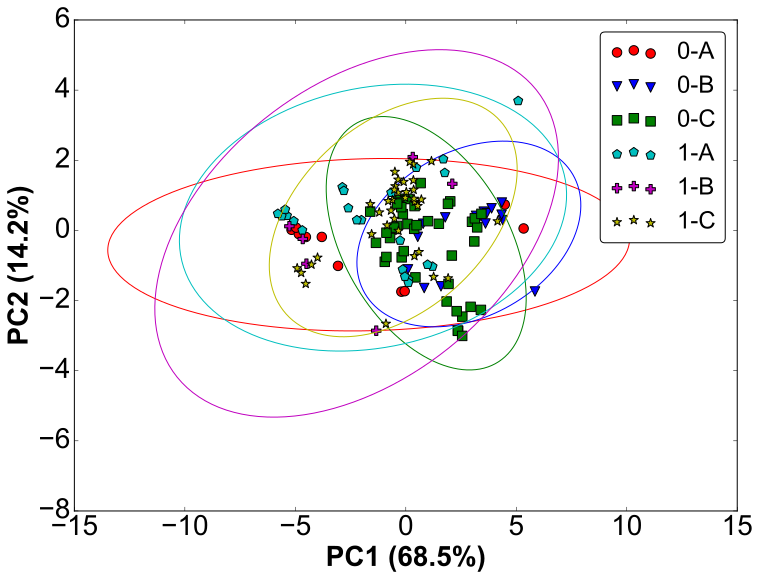

In [11]:
pca = CalcPCA()
pca.fit(X, y2)
fig = pca.plotpc()
fig.savefig(f"out/enose kakao_pca baseline_{tanggal}.svg")

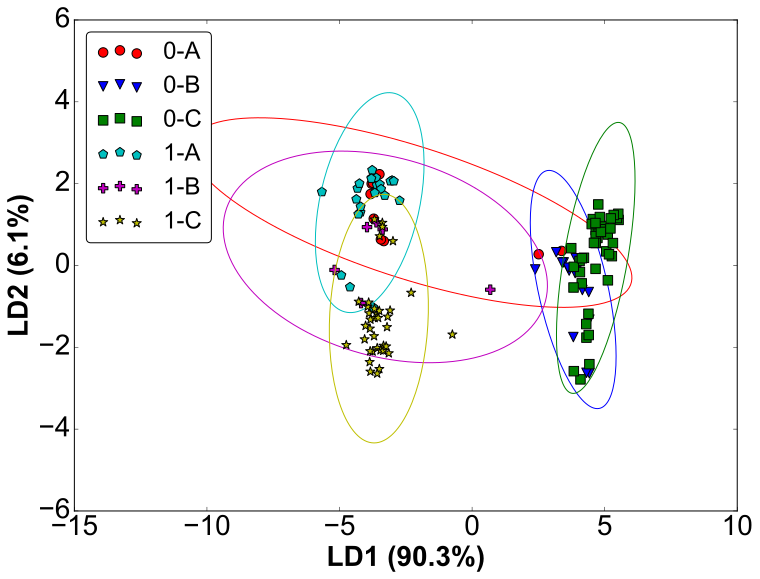

In [12]:
lda = CalcLDA()
lda.fit(X, y2)
fig = lda.plotlda()
fig.savefig(f"out/enose kakao_lda baseline_{tanggal}.svg")